## Objetivo: Identificación de Pacientes con Alto Riesgo de Recaída

Vamos a estimar el coste de un cáncer en España. La información la encontramos en los siguientes artículos:
- https://www.contraelcancer.es/sites/default/files/content-file/Informe-Los-costes-cancer.pdf
- https://www.cancer.net/es/tipos-de-c%C3%A1ncer/c%C3%A1ncer-de-mama/estad%C3%ADsticas
- https://elpais.com/sociedad/2023-05-23/la-formula-360-que-ha-cambiado-el-pronostico-del-cancer-de-mama-y-reduce-el-riesgo-de-recaidas.html#

Vamos a seguir los siguientes árboles de decisión:

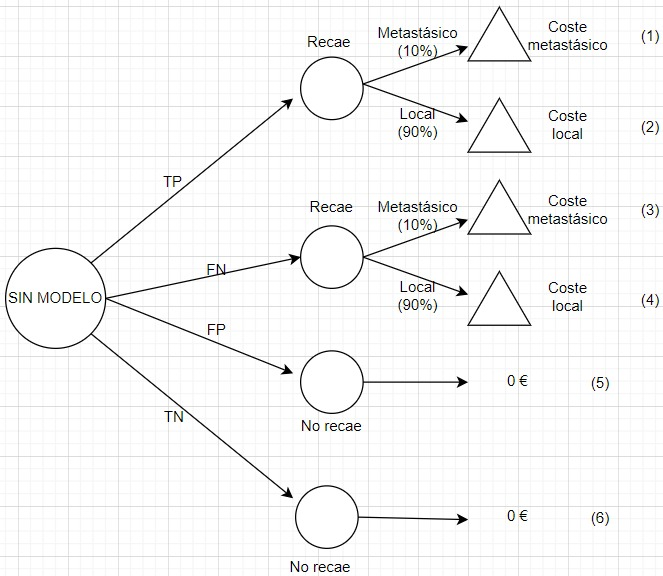

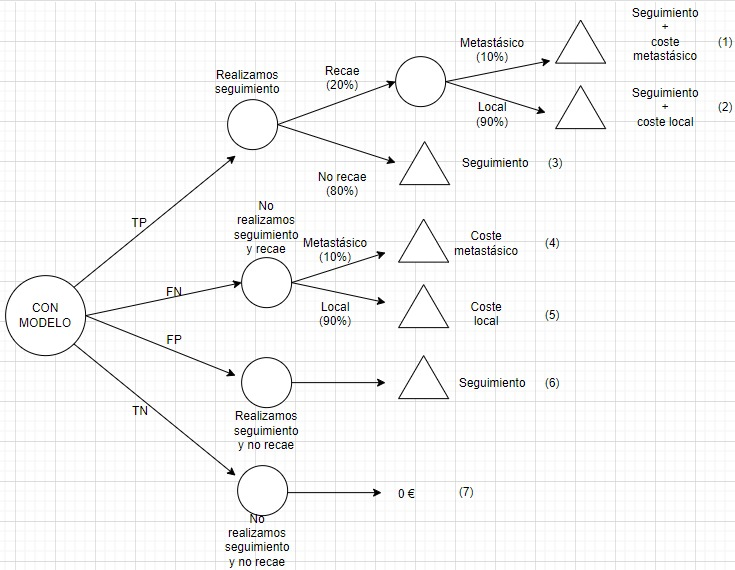

### Definimos los siguientes costes:

In [1]:
porcentaje_casos_metastaticos = 0.1

In [2]:
porcentaje_casos_locales = 0.9

In [3]:
coste_cuidados_paliativos = 7832

In [4]:
coste_medio_anual_metastático = 35732

In [5]:
coste_medio_anual_local = 8271

In [6]:
duracion_metastático = 10 #Años

In [7]:
duracion_local = 5 #Años

In [8]:
coste_total_metastático = coste_medio_anual_metastático * duracion_metastático + coste_cuidados_paliativos
coste_total_metastático

365152

In [9]:
coste_total_local = coste_medio_anual_local * duracion_local + coste_cuidados_paliativos
coste_total_local

49187

In [10]:
coste_seguimiento = 40000

In [11]:
porcentaje_recaidas_tras_seguimiento = 0.2

In [12]:
porcentaje_no_recaidas_tras_seguimiento = 0.8

### Calculamos los costes aplicando y sin aplicar nuestro modelo

Usamos las métricas obtenidas en nuestro modelo y los pasamos a porcentaje

In [13]:
def calcular_coste_con_modelo(tp, fn, fp, tn, N):
    c1 = tp*porcentaje_recaidas_tras_seguimiento*porcentaje_casos_metastaticos*(coste_total_metastático + coste_seguimiento)
    c2 = tp*porcentaje_recaidas_tras_seguimiento*porcentaje_casos_locales*(coste_total_local + coste_seguimiento)
    c3 = tp*porcentaje_no_recaidas_tras_seguimiento*coste_seguimiento
    c4 = fn*porcentaje_casos_metastaticos*coste_total_metastático
    c5 = fn*porcentaje_casos_locales*coste_total_local
    c6 = fp*coste_seguimiento
    c7 = tn*0
    return (c1+c2+c3+c4+c5+c6+c7)*N

In [14]:
def calcular_coste_sin_modelo(tp, fn, fp, tn, N):
    c1 = tp*porcentaje_casos_metastaticos*coste_total_metastático
    c2 = tp*porcentaje_casos_locales*coste_total_local
    c3 = fn*porcentaje_casos_metastaticos*coste_total_metastático
    c4 = fn*porcentaje_casos_locales*coste_total_local
    c5 = fp*0
    c6 = tn*0
    return (c1+c2+c3+c4+c5+c6)*N

In [18]:
def calcular_reduccion_costes(tp, fn, fp, tn, N):
    reduccion_absoluta = calcular_coste_con_modelo(tp, fn, fp, tn, N) - calcular_coste_sin_modelo(tp, fn, fp, tn, N)
    reduccion_relativa = (reduccion_absoluta/calcular_coste_con_modelo(tp, fn, fp, tn, N))*100
    print(f'Aplicando el modelo dado a {N} clientes y con las metricas del modelo dadas, hay una reducción de {reduccion_absoluta} euros. Lo que supondría una reducción del {reduccion_relativa}% de los costes')

### Vemos si los resultados de nuestro modelo cumplen el objetivo

In [19]:
tp_1_t = 49
fn_1_t = 262
fp_1_t = 50
tn_1_t = 356
N_1 = tp_1_t + fn_1_t + fp_1_t + tn_1_t

tp_1 = tp_1_t/N_1
fn_1 = tp_1_t/N_1
fp_1 = tp_1_t/N_1
tn_1 = tp_1_t/N_1

calcular_reduccion_costes(tp_1, fn_1, fp_1, tn_1, N_1)

Aplicando el modelo dado a 717 clientes y con las metricas del modelo dadas, hay una reducción de 753286.7999999998 euros. Lo que supondría una reducción del 8.68835911793928% de los costes


In [20]:
tp_2_t = 56
fn_2_t = 345
fp_2_t = 43
tn_2_t = 273
N_2 = tp_2_t + fn_2_t + fp_2_t + tn_2_t

tp_2 = tp_2_t/N_2
fn_2 = tp_2_t/N_2
fp_2 = tp_2_t/N_2
tn_2 = tp_2_t/N_2

calcular_reduccion_costes(tp_2, fn_2, fp_2, tn_2, N_2)

Aplicando el modelo dado a 717 clientes y con las metricas del modelo dadas, hay una reducción de 860899.1999999993 euros. Lo que supondría una reducción del 8.688359117939275% de los costes
